<a href="https://colab.research.google.com/github/LearningBoy2002/Sentiment-Analysis/blob/main/Preprocessing_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd

In [2]:
#!pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [3]:
file_path = "YoutubeCommentsDataSet.csv"


In [4]:
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,  # Load as Pandas DataFrame
    "atifaliak/youtube-comments-dataset",  # Kaggle dataset name
    file_path,
)
df.head()

<ipython-input-4-907c5a8259ce>:1: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [7]:
sentiment_mapping = {"positive": 1, "negative": -1, "neutral": 0}
df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)
df = df.rename(columns={"Comment": "clean_comment", "Sentiment": "category"})

<ipython-input-7-f9f593b0cc9c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)


In [8]:
df.head()

,clean_comment,category
0,lets not forget that apple pay in 2014 require...,0
1,here in nz 50 of retailers don’t even have con...,-1
2,i will forever acknowledge this channel with t...,1
3,whenever i go to a place that doesn’t take app...,-1
4,apple pay is so convenient secure and easy to ...,1


In [9]:
df.shape

(18408, 2)

In [10]:
df.sample()['clean_comment'].values

array(['pragg plays a sneaky rook move aronian pushes a pawn antonio hello everyone'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  18364 non-null  object
 1   category       18408 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.8+ KB


In [12]:
df.isnull().sum()

,0
clean_comment,44
category,0


In [13]:
df[df['clean_comment'].isna()]

,clean_comment,category
602,NaN,-1
716,NaN,0
812,NaN,1
1021,NaN,1
1023,NaN,0
1041,NaN,1
1094,NaN,1
2443,NaN,1
3014,NaN,1
3235,NaN,1


In [14]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
1,30
0,13
-1,1


In [15]:
df.dropna(inplace=True)

In [16]:
df.duplicated().sum()

490

In [17]:
df[df.duplicated()]

,clean_comment,category
173,from all the stuff mentioned i have the dji mi...,1
518,happy independence day to ukraine and glory t...,-1
847,linus just turn the key lights 180 and bounce ...,1
848,dan continues to be my new favorite he has suc...,1
849,dan managing to set up his soldering station o...,1
...,...,...
18145,explore our free courses with completion certi...,0
18283,thanks for this video very neatly calmly expla...,1
18298,explore our free courses with completion certi...,0
18308,do you want to learn technology from me check ...,0


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category


In [21]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()


,clean_comment,category
0,lets not forget that apple pay in 2014 require...,0
1,here in nz 50 of retailers don’t even have con...,-1
2,i will forever acknowledge this channel with t...,1
3,whenever i go to a place that doesn’t take app...,-1
4,apple pay is so convenient secure and easy to ...,1


In [22]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
20,linus just turn the key lights 180 and bounce ...,1
30,unstoppable experiments with liquid nitrogen,1
35,കേരളത്തിൽ ആദ്യമായി പെട്രോളിനെ എയ്സ് ആക്കിയ m4...,0
38,തന്നെ തളർത്താൻ നോക്കിയവർ പോലും അവന്റെ ഉയർച്ചയി...,0
39,എത്ര എടുത്താലും തീരാത്ത liquid nitrogen,0
...,...,...
18250,wow congratulations for starting such an amazi...,1
18278,omg such awesome day to day life examples give...,1
18343,amazing explanation i loved the way you taught,1
18349,idk if you realise the intensity of positive i...,1


In [23]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [24]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,clean_comment,category


In [25]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()


,clean_comment,category


In [26]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining


,clean_comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

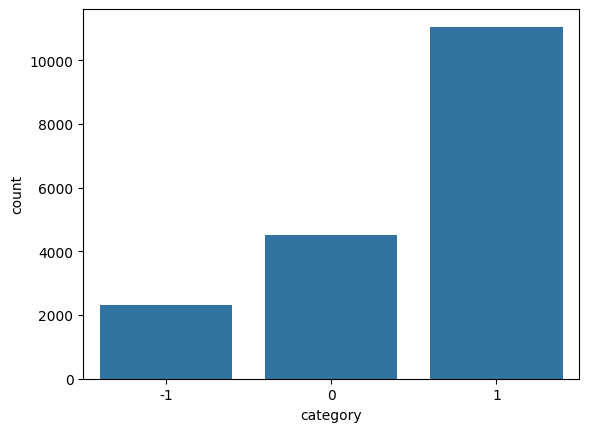

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [28]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,61.84
0,25.19
-1,12.96


In [29]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [30]:
df.sample(5)

,clean_comment,category,word_count
8558,the usps store in my hometown is atleast the t...,1,52
6589,if theres one thing to take away from the viki...,0,17
14916,dr chucks python course is literally how i got...,1,54
1322,110 love the inevitable evan longoria clip but...,1,30
7338,they have all been in the game for so many yea...,1,17


In [31]:
df['word_count'].describe()

,word_count
count,17874.000000
mean,32.991664
std,45.526381
min,1.000000
25%,12.000000
50%,21.000000
75%,38.000000
max,1353.000000


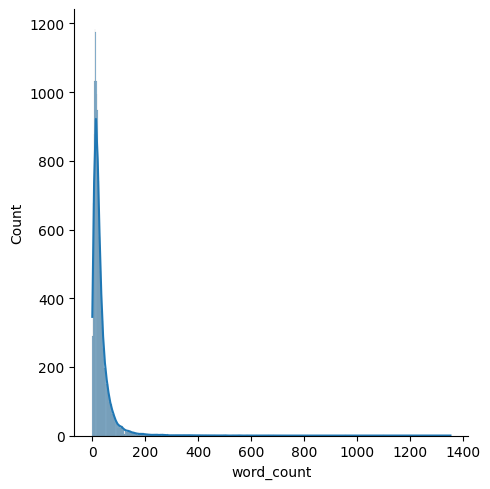

In [32]:
sns.displot(df['word_count'], kde=True)

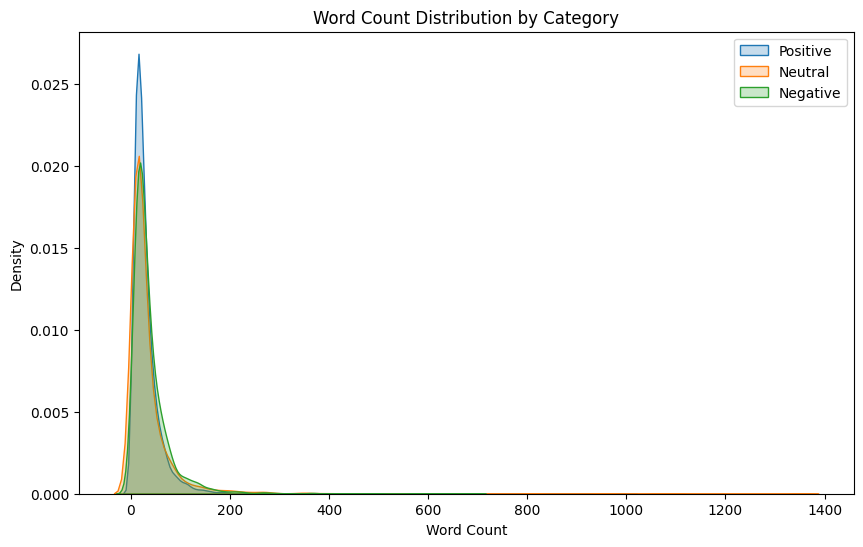

In [33]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

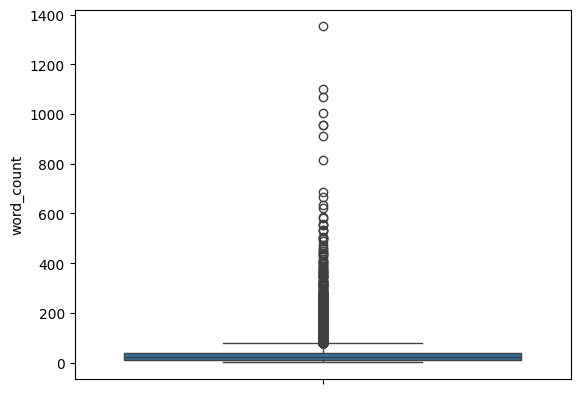

In [34]:
sns.boxplot(df['word_count'])

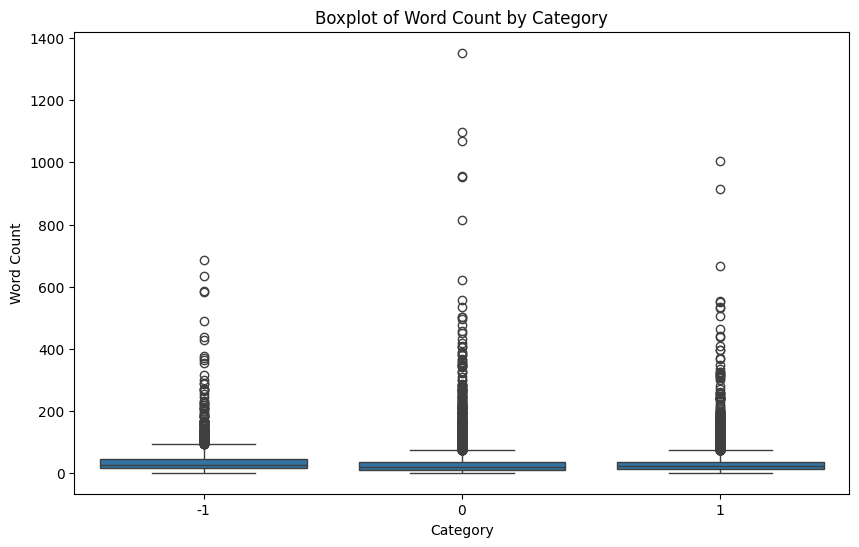

In [35]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

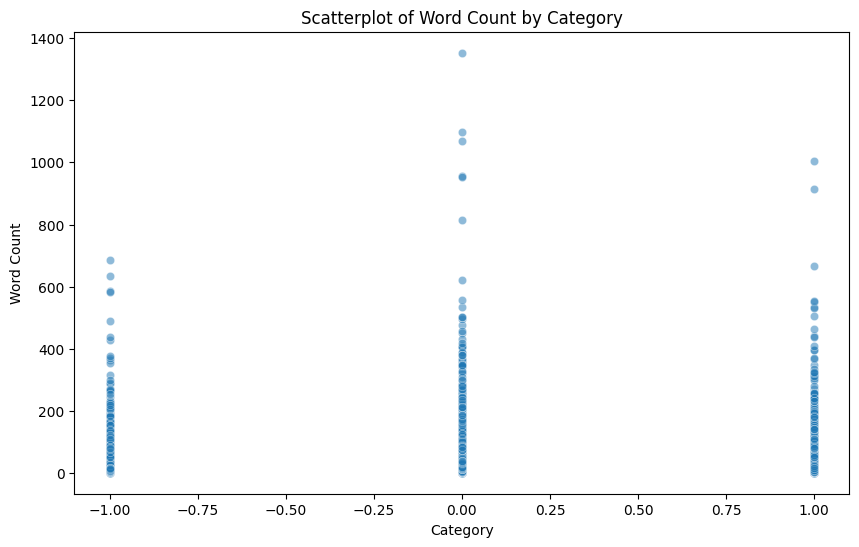

In [36]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

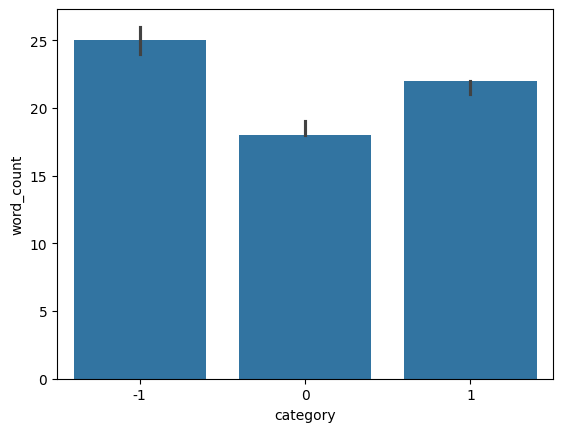

In [37]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [38]:
!pip install nltk

In [39]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
#df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

def number_of_stop_words(text):
  words = text.split()
  count =0
  for word in words:
    if word in stop_words:
      count+=1
  return count

df['num_stop_words'] = df['clean_comment'].apply(number_of_stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
4783,daniel will he have the “cojones” to go for it oo,0,11,7
17440,its two different things to start learning and...,0,270,137
533,being a politician should not be a career choi...,-1,13,7
17162,i am always waiting to see your new videos the...,1,17,8
6265,one thing that this is proof of is that mankin...,1,143,67


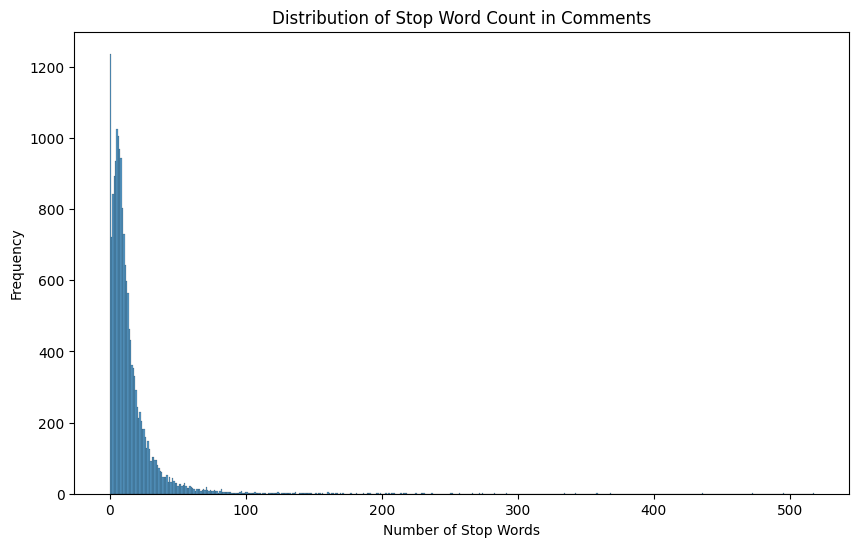

In [49]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'])
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


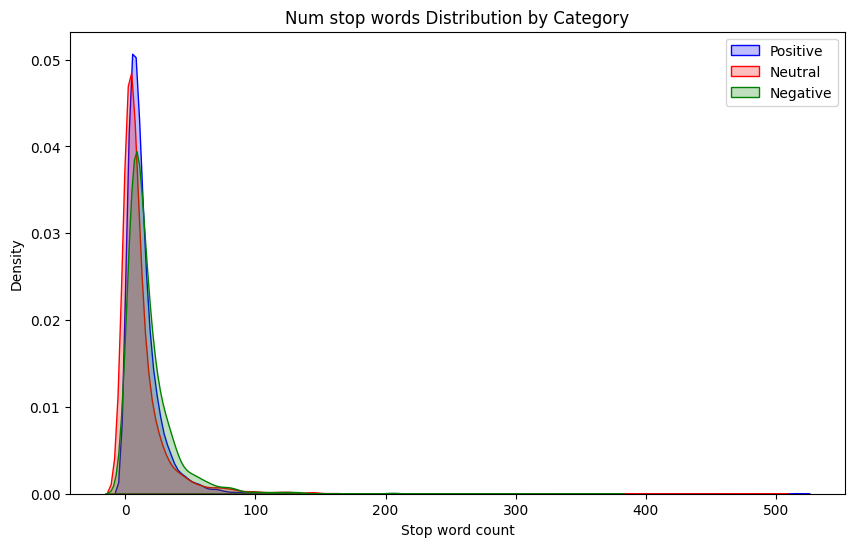

In [50]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True, color = 'blue')

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True, color='red')

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True, color= 'green')

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

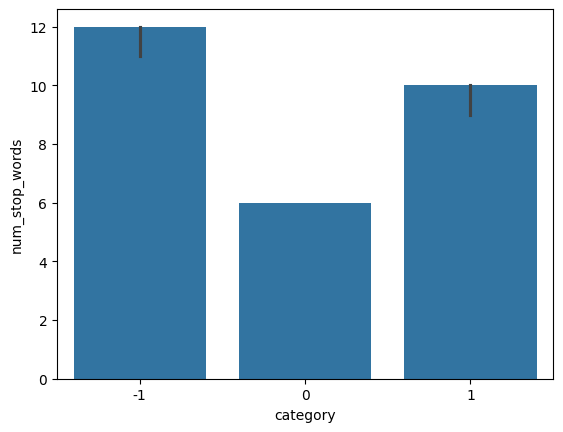

In [51]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

<ipython-input-52-24de6c77347d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


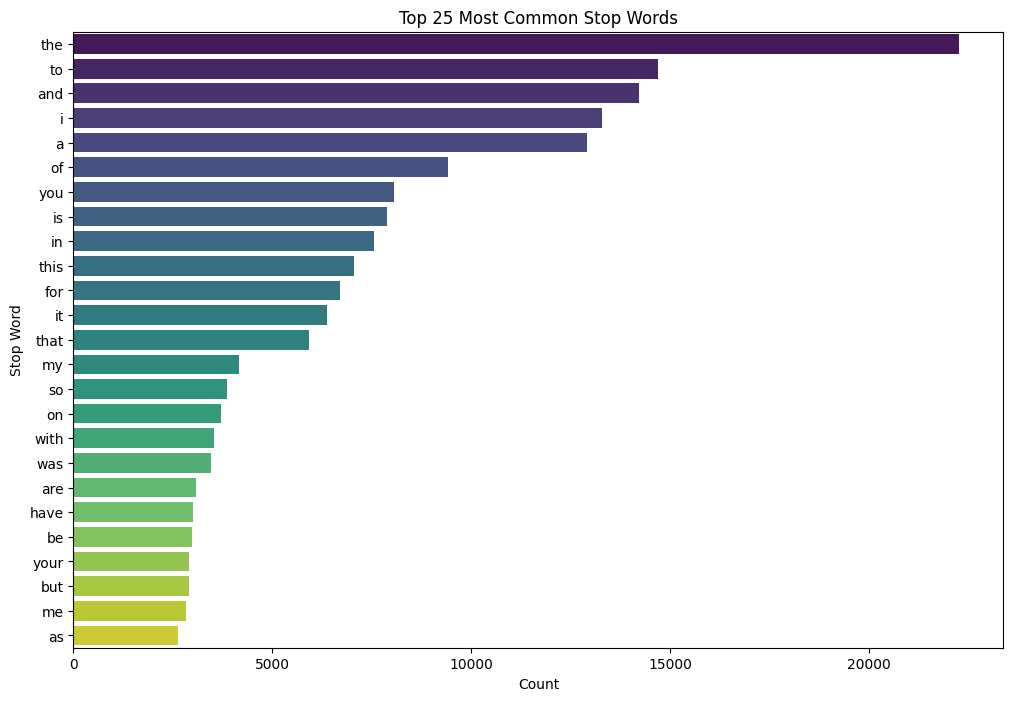

In [52]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [53]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,lets not forget that apple pay in 2014 require...,0,57,23,317
1,here in nz 50 of retailers don’t even have con...,-1,29,10,163
2,i will forever acknowledge this channel with t...,1,31,16,183
3,whenever i go to a place that doesn’t take app...,-1,83,34,450
4,apple pay is so convenient secure and easy to ...,1,26,12,135


In [54]:
df['num_chars'].describe()

,num_chars
count,17874.000000
mean,177.567976
std,252.165111
min,2.000000
25%,66.000000
50%,113.000000
75%,201.000000
max,7847.000000


In [55]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [56]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., 'ள', 'ፊ', 'ئ'], dtype=object)

In [57]:
char_frequency_df.tail(50)

,character,frequency
1264,文,1
1266,仝,1
1267,線,1
1303,壇,1
1305,陳,1
1367,𝓽,1
1343,ዋ,1
1346,ት,1
1347,ኪ,1
1348,ቹ,1


In [58]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
8840,this shit money bagg never disappoints,1,6,1,41,0
15474,get the products here nintendo switch earbuds ...,0,15,2,102,0
13859,great way to get ahead so i can make it into h...,1,46,18,258,0
1498,hopefully we stop hearing about how much troub...,1,23,11,137,0
5140,thank you for a well done video i am certainly...,1,39,20,193,0


In [59]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,17874.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [60]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [61]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,590996
1,e,301435
2,t,225325
11,a,207323
6,o,200811
14,i,192615
5,n,172531
3,s,168467
8,r,137793
10,h,120846


In [62]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget that apple pay in 2014 require...,0,57,23,317,0
1,here in nz 50 of retailers dont even have cont...,-1,29,10,163,0
2,i will forever acknowledge this channel with t...,1,31,16,183,0
3,whenever i go to a place that doesnt take appl...,-1,83,34,450,0
4,apple pay is so convenient secure and easy to ...,1,26,12,135,0


In [63]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [64]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget apple pay 2014 required brand ...,0,57,23,317,0
1,nz 50 retailers dont even contactless credit c...,-1,29,10,163,0
2,forever acknowledge channel help lessons ideas...,1,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,-1,83,34,450,0
4,apple pay convenient secure easy use used kore...,1,26,12,135,0


In [65]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,let not forget apple pay 2014 required brand n...,0,57,23,317,0
1,nz 50 retailer dont even contactless credit ca...,-1,29,10,163,0
2,forever acknowledge channel help lesson idea e...,1,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,-1,83,34,450,0
4,apple pay convenient secure easy use used kore...,1,26,12,135,0


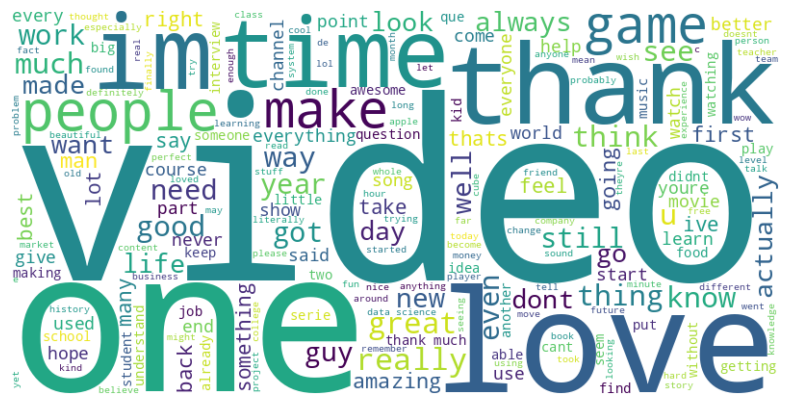

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

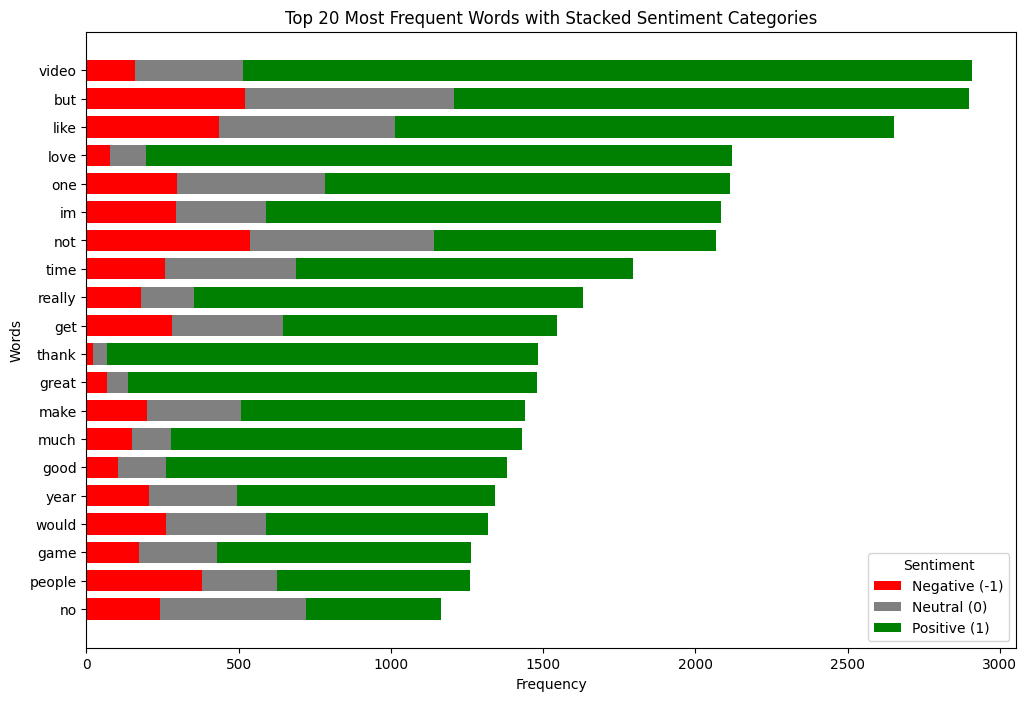

In [68]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)


@bishwarup